#  RED  WINE PREDICTION PROJECT

In [2]:
# Importing necessary libraries
import warnings
warnings.simplefilter("ignore")  # Ignore warnings

import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore


# Importing preprocessing and model-related libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier


# Importing metrics for model evaluation
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
# Displaying the shape of the DataFrame 'df' to show the number of rows and columns
df.shape

(1599, 12)

In [5]:
# Checking for missing values in each column of the DataFrame 'df'
# The result is a Series showing the sum of missing values for each column.
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing values observed in any of the columns in our dataset. 

In [6]:
# Displaying concise information about the DataFrame 'df'.
# This includes the data types of each column, the number of non-null values,
# and a memory usage summary, providing an overview of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


None of the columns contain object data type values. The only integer value in our dataset is the label, making all the feature columns share a consistent float data type. This uniform data type across features simplifies the data structure and enhances compatibility for further analysis or modeling.

In [7]:
# Generating descriptive statistics for the numerical columns in the DataFrame 'df'
# This includes count, mean, standard deviation, minimum, 25th percentile (Q1),
# median (50th percentile or Q2), 75th percentile (Q3), and maximum values.
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


By employing the describe method, I've extracted key statistical metrics such as count, mean, standard deviation, minimum, maximum, and interquartile values for our dataset.

Upon careful observation:

1.A substantial disparity is evident between the 75th percentile and the maximum values in the 'residual sugar' column.
2.A notable gap exists between the 75th percentile and the maximum values in the 'free sulfur dioxide' column.
3.There is a significant contrast between the 75th percentile and the maximum value in the 'total sulfur dioxide' column.

These pronounced gaps strongly suggest the presence of outliers in our dataset. Addressing these outliers may be necessary to enhance the accuracy of our modeling process.

In [8]:
# Computing the skewness of each numerical column in 'df' to assess data distribution asymmetry.
# Skewness values near 0 imply symmetry, while positive/negative values indicate right/left skewness.
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

Examining the skewness information across our dataset, we omit the 'quality' column as it serves as our target label. Focusing on the feature columns, we observe that 'fixed acidity,' 'volatile acidity,' 'residual sugar,' 'chlorides,' 'free sulfur dioxide,' 'total sulfur dioxide,' 'density,' 'sulphates,' and 'alcohol' all exhibit skewness beyond the acceptable range of +/-0.5. This skewness suggests the presence of outliers in these features, which may necessitate treatment for improved data integrity.

# DATA VISUALIZATION

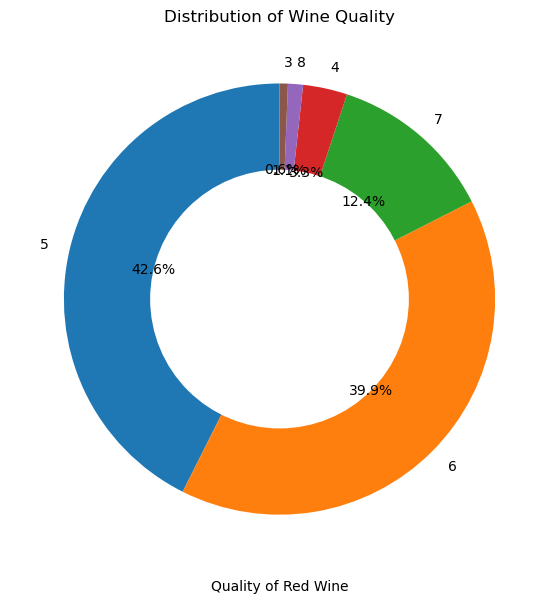

In [9]:
# Counting the occurrences of each quality level
quality_counts = df['quality'].value_counts()

# Plotting a doughnut chart
plt.figure(figsize=(7, 7))
plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.5))
plt.gca().add_artist(plt.Circle((0, 0), 0.6, fc='white'))

# Adding labels and title
plt.xlabel('Quality of Red Wine')
plt.title('Distribution of Wine Quality')

# Displaying the chart
plt.show()

The doughnut chart highlights the imbalance in the distribution of red wine quality categories.
Quality scores 5 and 6 dominate the dataset, emphasizing the need to address this imbalance to prevent bias,in machine learning models during prediction.

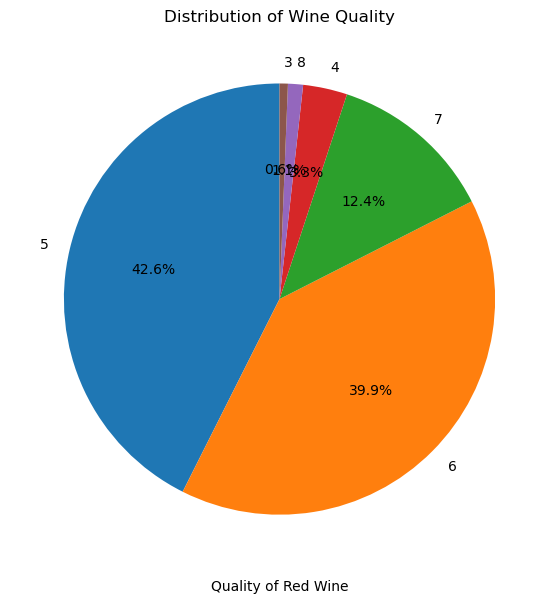

In [78]:
# Plotting a pie chart
plt.figure(figsize=(7, 7))
plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%', startangle=90)

# Adding labels and title
plt.xlabel('Quality of Red Wine')
plt.title('Distribution of Wine Quality')

# Displaying the chart
plt.show()

The pie chart vividly illustrates the imbalance in the distribution of red wine quality categories, with quality scores 5 and 6 overwhelmingly dominating the dataset. This emphasizes the importance of addressing this imbalance to mitigate potential bias in machine learning models during prediction.

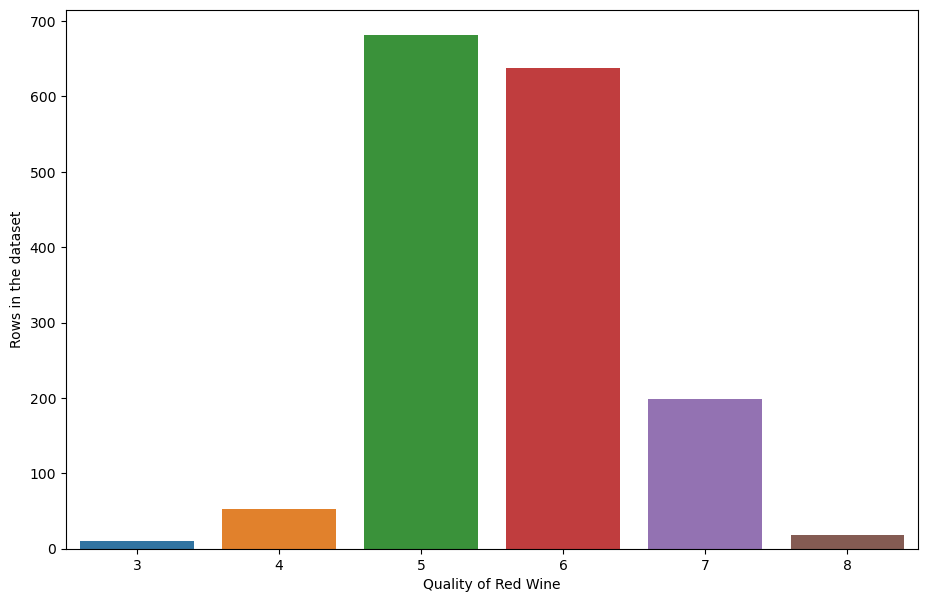

In [10]:
# Creating a countplot to visualize the distribution of 'quality' in the red wine dataset
# The x-axis represents the quality levels, and the y-axis shows the count of rows for each quality level.
# This helps in understanding the distribution of wine quality in the dataset.
plt.figure(figsize=(11, 7))
sns.countplot(x='quality', data=df)
plt.xlabel('Quality of Red Wine')
plt.ylabel('Rows in the dataset')
plt.show()

In the countplot visualization, we observe different categories of red wine quality, highlighting a notable imbalance. The abundance of data for quality scores 5 and 6 surpasses that of other scores. This imbalance is crucial to address, as it could introduce bias in our machine learning model during prediction. Rectifying this imbalance is essential to ensure a fair and unbiased performance across all quality categories.

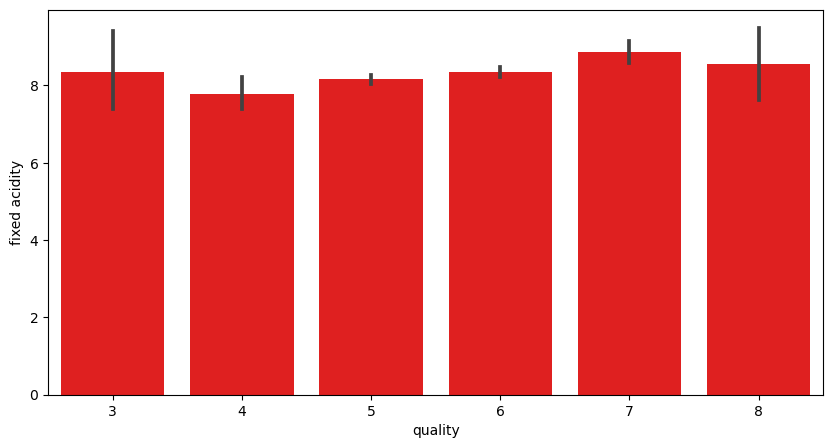

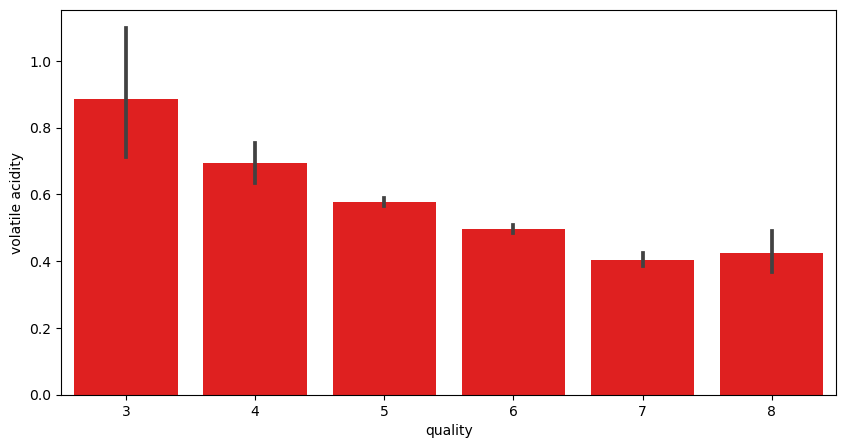

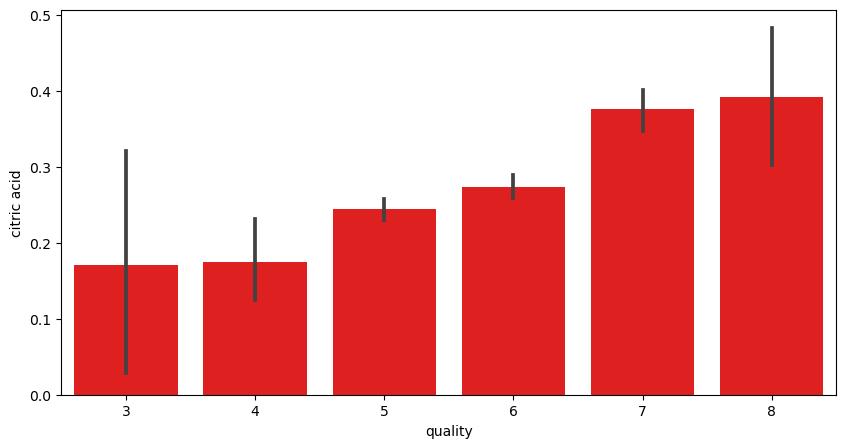

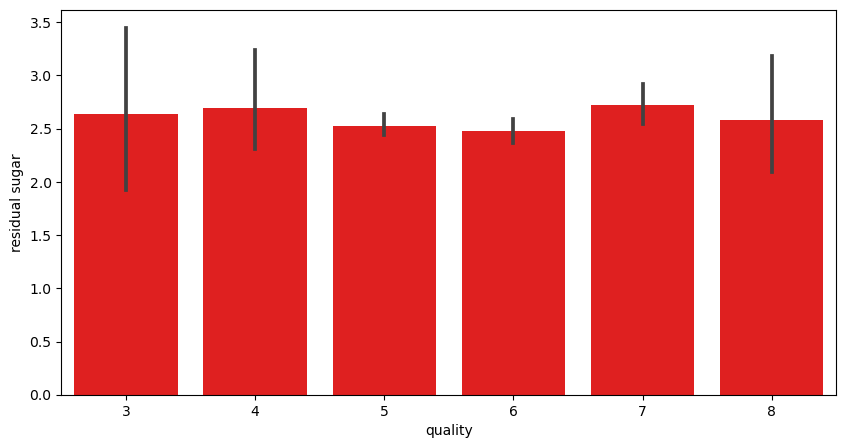

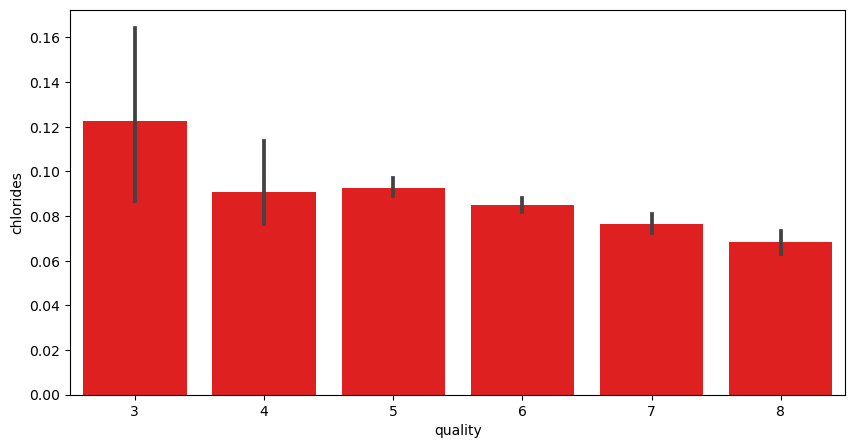

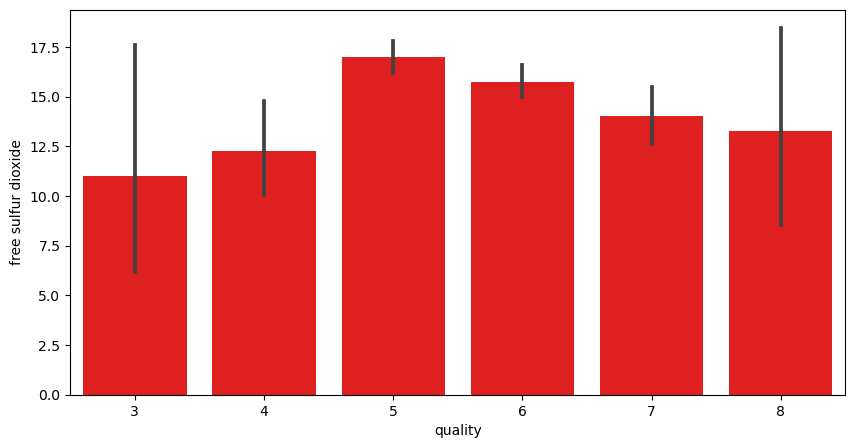

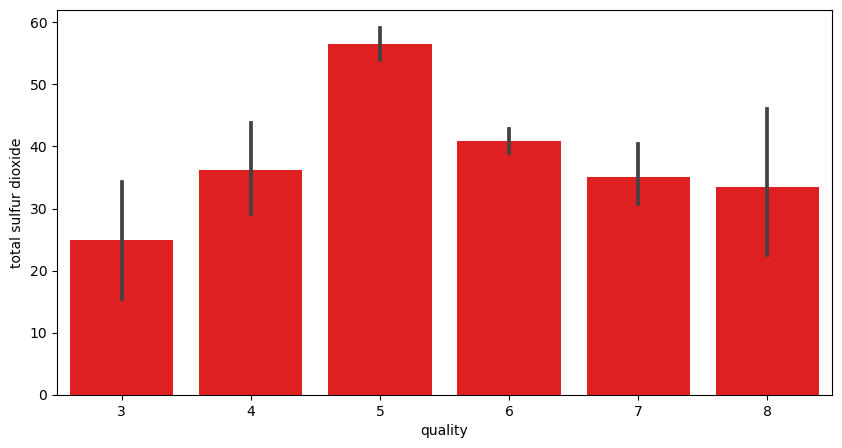

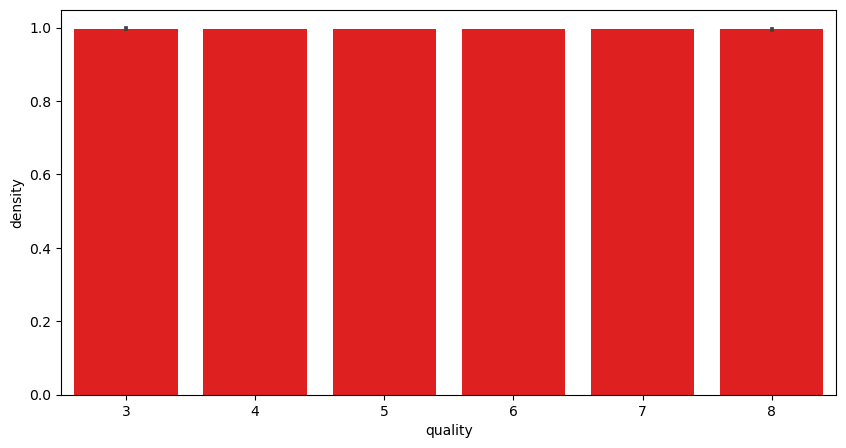

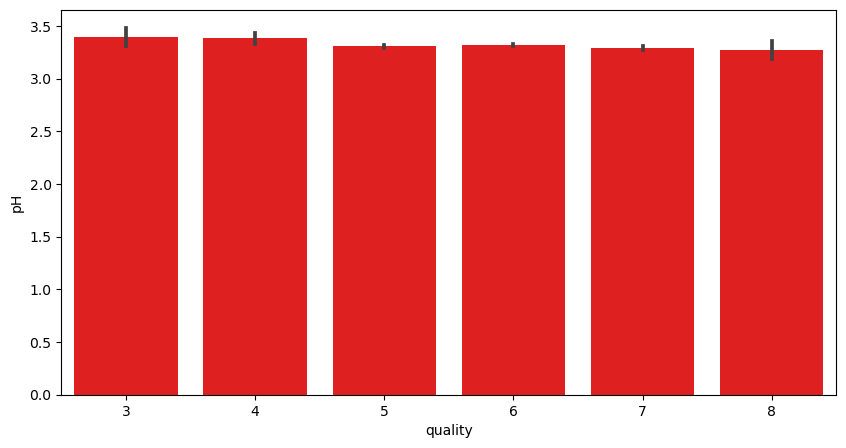

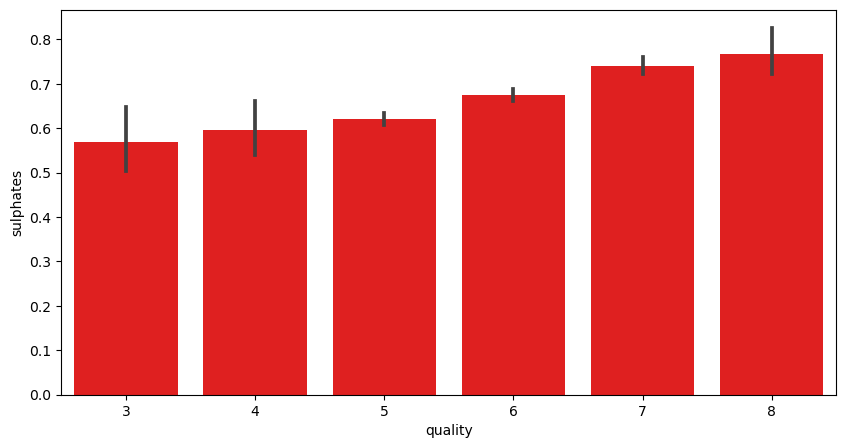

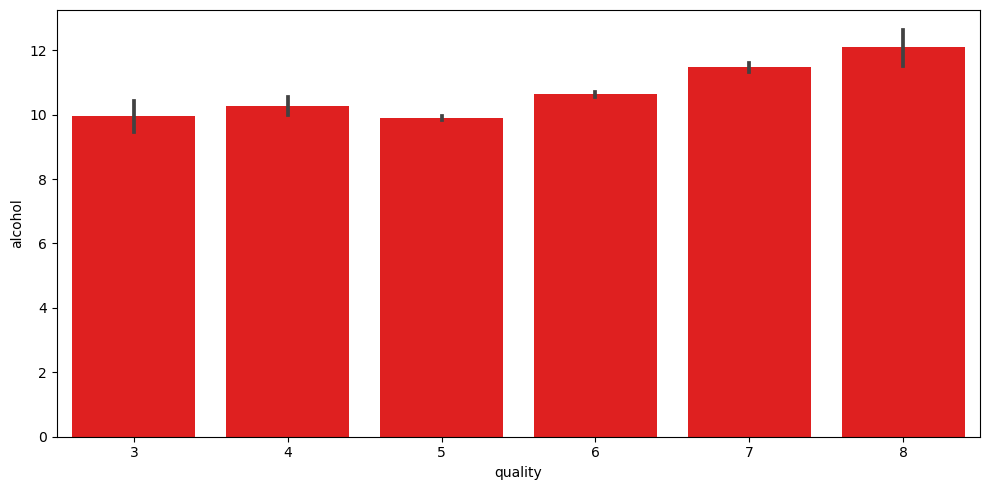

In [11]:
# Initializing variables for index, labels, and features to create individual barplots
index = 0
labels = df['quality']
features = df.drop('quality', axis=1)

# Iterating through each feature column to generate separate barplots
# The x-axis represents the 'quality' labels, and the y-axis displays the values of each feature.
# Each barplot is colored in "deeppink" for visibility.
for col in features.items():
    # Creating a new figure for each feature to ensure separate visualizations
    plt.figure(figsize=(10, 5))
    
    # Generating a barplot for the current feature and quality labels
    sns.barplot(x=labels, y=col[index], data=df, color="red")
    
# Adjusting layout for better visualization
plt.tight_layout()
plt.show()

Analyzing the impact of each feature on predicting the target variable ('quality') through barplots.

Observations:
1.Fixed acidity vs quality - No consistent pattern observed.
2.Volatile acidity vs quality - Exhibits a decreasing trend.
3.Citric acid vs quality - Shows an increasing trend.
4.Residual sugar vs quality - No discernible pattern.
5.Chlorides vs quality - Demonstrates a decreasing trend.
6.Free sulfur dioxide vs quality - No fixed pattern, fluctuates between increasing and decreasing.
7.Total sulfur dioxide vs quality - No fixed pattern, fluctuates between increasing and decreasing.
8.Density vs quality - No apparent pattern.
9.pH vs quality - No apparent pattern.
10.Sulphates vs quality - Displays an increasing trend.
11.Alcohol vs quality - Displays an increasing trend.

Conclusion:
Citric acid, sulphates, and alcohol emerge as pivotal factors influencing the prediction of wine quality.
Higher values in these features tend to be associated with better quality wine.

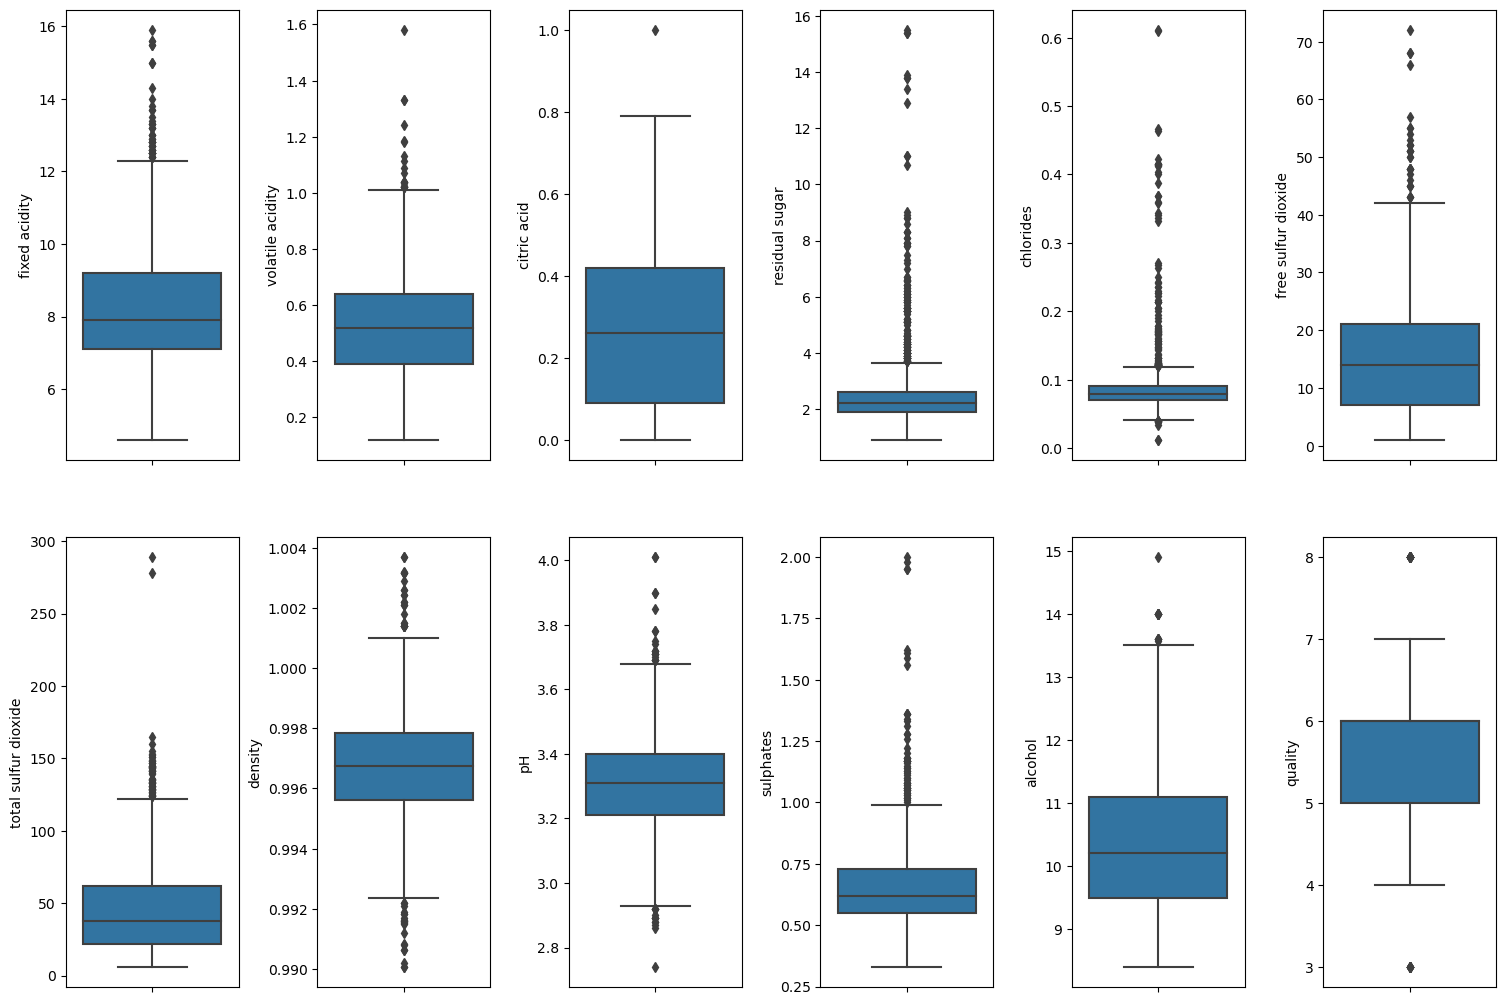

In [12]:
# Creating subplots for boxplots to visualize the distribution and identify potential outliers in the dataset

# Setting up the subplots with 6 columns and 2 rows
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15, 10))
index = 0
ax = ax.flatten()

# Iterating through each column in the DataFrame to generate individual boxplots
for col, value in df.items():
    # Creating a boxplot for the current column
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1

# Adjusting layout for better visualization
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

Utilizing boxplots to visually inspect whisker details and identify potential outliers in the dataset.

Observations:
1.Continuous outlier sections are disregarded.
2.Single-value outliers that significantly deviate from boxplot whiskers may require further treatment.
3.The primary focus is on data retention, aiming to preserve as much information as possible in the dataset.

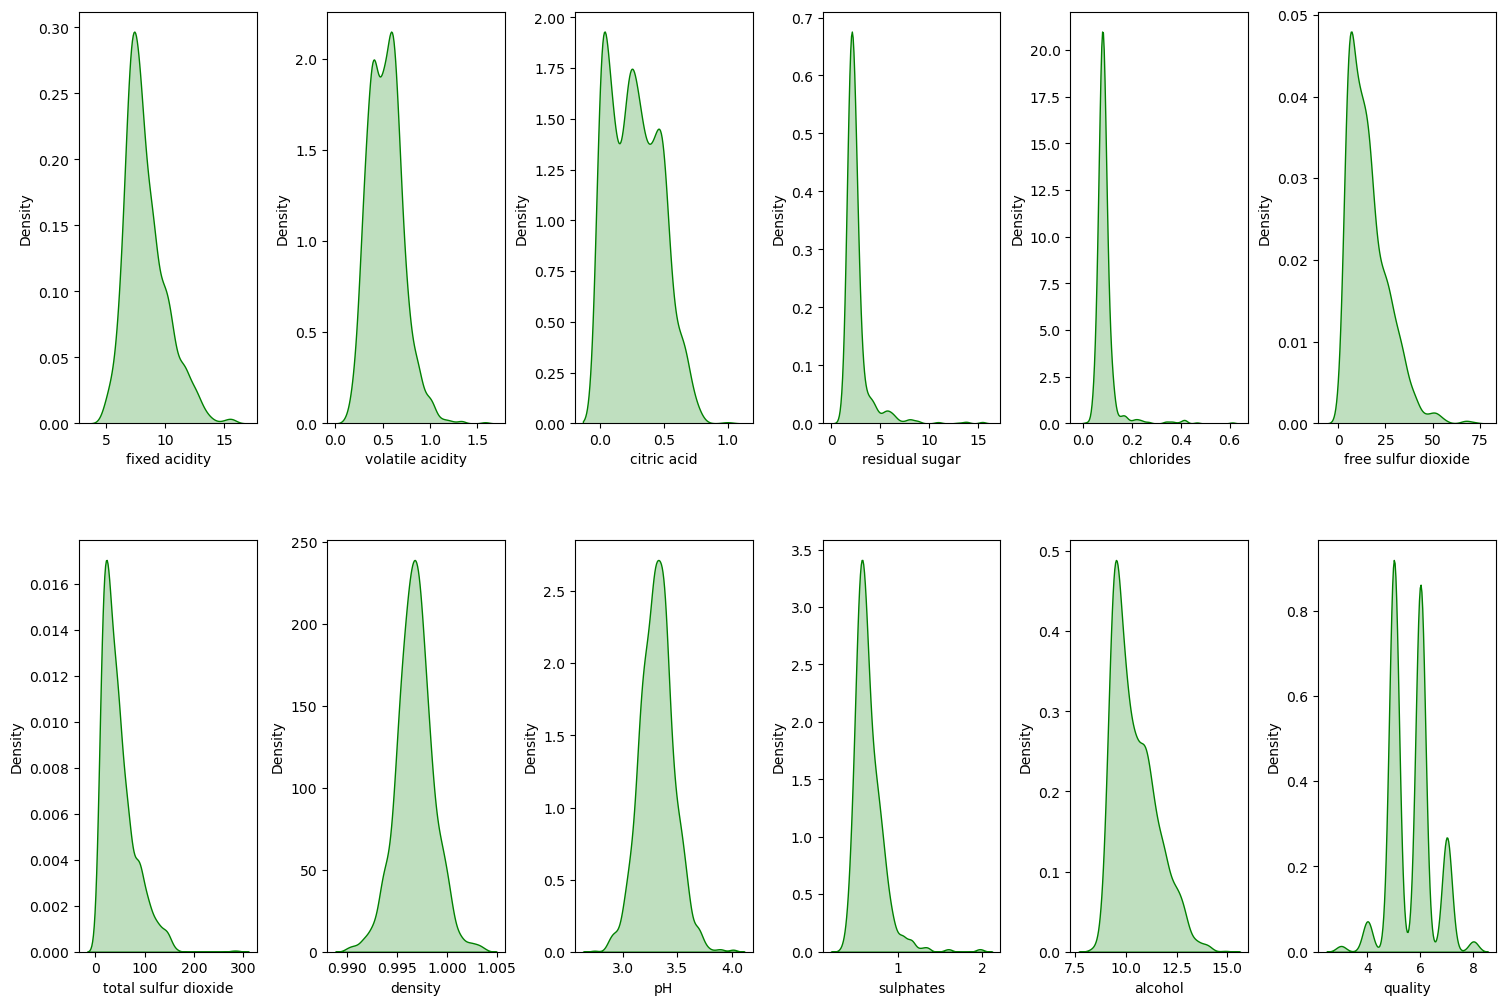

In [13]:
# Creating subplots for kernel density estimation (KDE) plots to visualize the distribution of each feature

# Setting up the subplots with 6 columns and 2 rows
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15, 10))
index = 0
ax = ax.flatten()

# Iterating through each column in the DataFrame to generate individual KDE plots
for col, value in df.items():
    # Creating a KDE plot for the current column
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1

# Adjusting layout for better visualization
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

Analyzing distribution plots to assess the nature of feature column distributions

Observations:
1.Some columns exhibit a normal distribution with a proper bell-shaped curve.
2.However, skewness is evident in several feature columns, including citric acid, residual sugar,
3.chlorides, free sulfur dioxide, total sulfur dioxide, sulphates, and alcohol.
4.The label column is categorical, and addressing its imbalance will be a subsequent step.

Regarding Skewness and Outliers Treatment:
1.Decisions on skewness and outlier treatment will be based on the accuracy dependency of machine learning models.
2.The impact of these treatments will be evaluated during the model evaluation phase.

# HEATMAP

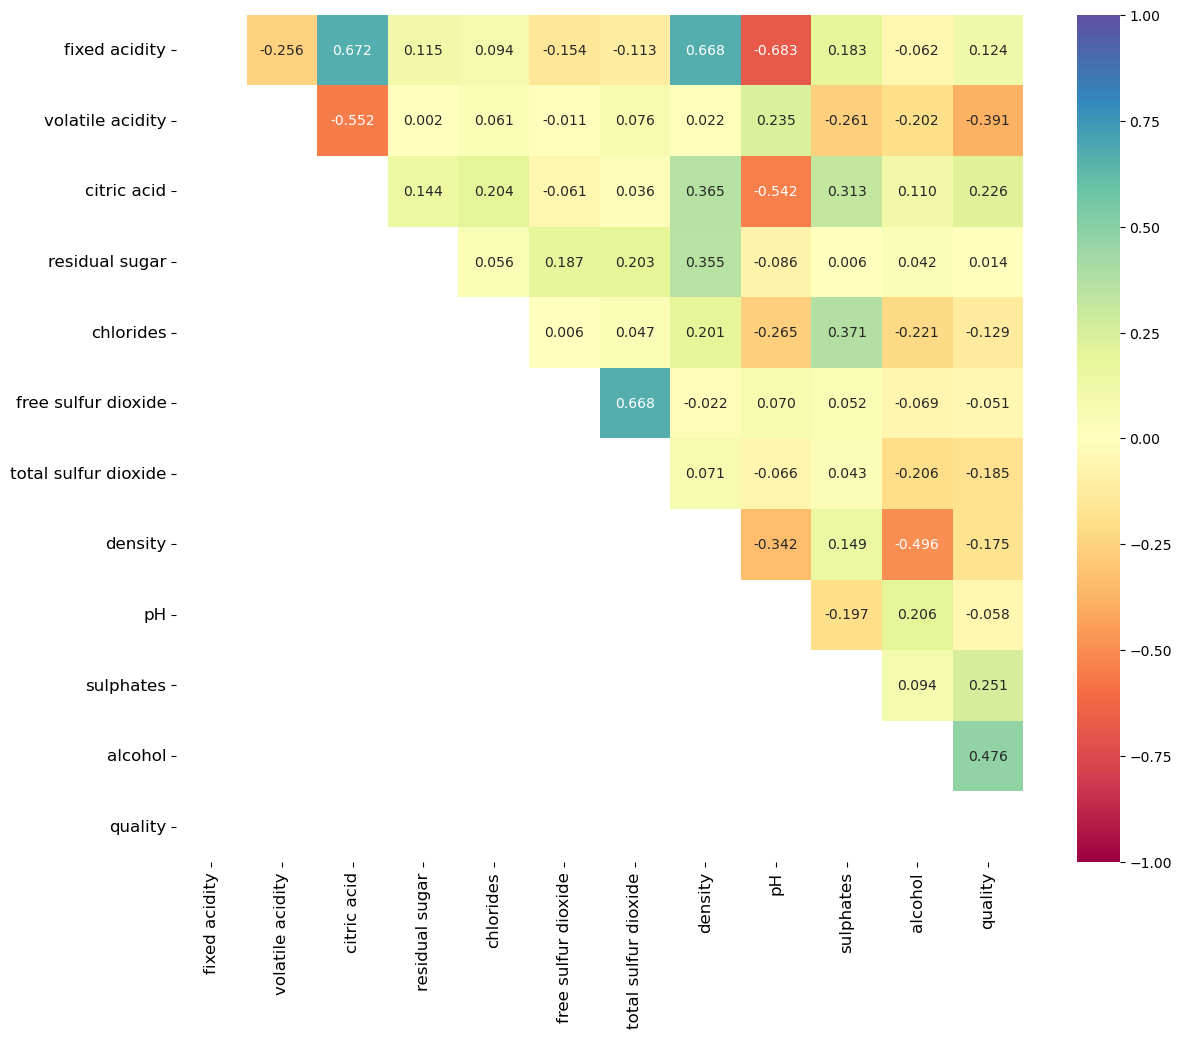

In [14]:
# The heatmap provides insights into the correlation between different features.
# Correlation values range from -1 to 1, where 1 indicates a perfect positive correlation,
# -1 indicates a perfect negative correlation, and 0 indicates no correlation.
# Features with high positive or negative correlations may exhibit multicollinearity.

# Creating a lower triangular matrix for masking in the heatmap
lower_triangle = np.tril(df.corr())

# Creating a heatmap to visualize the correlation matrix of the DataFrame 'df'
plt.figure(figsize=(14, 11))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f',
            annot_kws={'size': 10}, cmap="Spectral", mask=lower_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Analyzing the correlation matrix heatmap to understand relationships between features and the target label

Observations:
1.Positive correlation between the 'quality' column and 'alcohol,' and negative correlation with 'volatile acidity.'
2.'Quality' is least correlated with 'residual sugar' (coefficient value: 0.014, close to 0).
3.Positive correlation: 'fixed acidity' and 'citric acid' (0.672), 'fixed acidity' and 'density' (0.668),
4.'free sulfur dioxide' and 'total sulfur dioxide' (0.668).
5.Negative correlation: 'fixed acidity' and 'pH' (-0.683).

Concerns:
1.Some feature pairs show high positive correlation, raising the possibility of multicollinearity.
2.Close values to +1 or -1 may require addressing multicollinearity issues in the future.

Actions:
1.For highly correlated features, such as 'fixed acidity' and 'citric acid,' or 'fixed acidity' and 'density,'
2.consideration may be given to removing one of the features to mitigate multicollinearity.

The decision to address multicollinearity will be based on its impact on model accuracy during further analysis.

In [15]:
# Dropping the 'free sulfur dioxide' column from the DataFrame 'df'

# The decision to drop this column may be influenced by its high correlation with 'total sulfur dioxide'
# (correlation coefficient: 0.668), indicating potential multicollinearity concerns.
df = df.drop('free sulfur dioxide', axis=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


Eliminating the 'free sulfur dioxide' column as both 'free sulfur dioxide' and 'total sulfur dioxide'
represent the same sulfur dioxide feature. Retaining only the 'total sulfur dioxide' in the dataset.

# OUTLIER REMOVAL

In [16]:
# Displaying the shape of the DataFrame 'df' after dropping columns
df.shape

(1599, 11)

In [17]:
# Calculating the absolute Z-scores for each data point in the DataFrame 'df'
z = np.abs(zscore(df))

# Setting a threshold for identifying outliers
threshold = 3

# Identifying the indices of data points with Z-scores exceeding the threshold
outlier_indices = np.where(z > threshold)

# Filtering the DataFrame to exclude rows with outliers
df = df[(z < threshold).all(axis=1)]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


In [18]:
# following the removal of outliers using the Z-score method.
df.shape

(1464, 11)

In [19]:
# Calculating the percentage of data loss after outlier removal

# The original dataset had 1599 rows, and after removing outliers, the dataset was reduced to 1464 rows.
# The percentage of data loss is computed by taking the difference in row counts and dividing it by the original row count.
data_loss = (1599 - 1464) / 1599 * 100
data_loss

8.442776735459661

In [20]:
# Splitting the dataset into feature variable 'X' and label variable 'Y'
X = df.drop('quality', axis=1)  # Features
Y = df['quality']  # Label

# SOLVING PROBLEM OF CLASS IMBALANCE

In [21]:
# Displaying the counts of unique values in the target label column 'Y'

# The value_counts() method is used to count the occurrences of each unique value in the 'Y' series,
# providing insights into the distribution of wine quality categories.
Y.value_counts()

5    624
6    590
7    187
4     47
8     16
Name: quality, dtype: int64

Listing the unique values and their respective counts in the 'Y' series,highlighting the class imbalance that requires addressing through oversampling.

In [22]:
!pip install imbalanced-learn

In [23]:
# Importing necessary libraries, including SMOTE from imbalanced-learn
from imblearn.over_sampling import SMOTE

# Implementing oversampling using SMOTE to balance the class distribution of quality values

# The SMOTE (Synthetic Minority Over-sampling Technique) method is employed to generate synthetic samples
# for the minority classes, ensuring a more balanced distribution of quality values.

# The oversample variable is instantiated as an SMOTE object.
# The fit_resample() method is then used to apply oversampling to the feature variable 'X' and label variable 'Y'.
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [24]:
# Displaying the counts of unique values in the target label column 'Y' after oversampling

# The value_counts() method is used to count the occurrences of each unique value in the oversampled 'Y' series,
# providing insights into the distribution of wine quality categories after applying SMOTE oversampling.
Y.value_counts()

5    624
6    624
7    624
4    624
8    624
Name: quality, dtype: int64

After applying SMOTE oversampling, we reassess the distribution of wine quality categories.
The value_counts() method is utilized to count the occurrences of each unique value in the updated 'Y' series.
The class imbalance issue has been successfully addressed through oversampling, an equal representation of all quality categories in the dataset.This helps prevent bias in machine learning models, fostering improved performance across all classes.

In [25]:
Y # Showing label

0       5
1       5
2       5
3       6
4       5
       ..
3115    8
3116    8
3117    8
3118    8
3119    8
Name: quality, Length: 3120, dtype: int64

# LABEL BINARIZATION

In [26]:
# Applying label binarization to convert wine quality into a binary classification problem

# The lambda function is used to map quality values greater than or equal to 7 to 1 (good quality),
# and values less than 7 to 0 (not good quality).

# The 'Y' series is then updated with the binary labels, where 1 represents good quality and 0 represents not good quality.
Y = Y.apply(lambda y_value: 1 if y_value >= 7 else 0)

# Displaying the label after applying label binarization
Y

0       0
1       0
2       0
3       0
4       0
       ..
3115    1
3116    1
3117    1
3118    1
3119    1
Name: quality, Length: 3120, dtype: int64

The label binarization technique efficiently classifies wine quality into two major classes, simplifying the classification task.
Quality values greater than or equal to 7 are designated as 1 (good quality), and values less than 7 are designated as 0 (bad quality).

In [27]:
# Displaying all the features (excluding the label) after preprocessing

# The 'X' DataFrame contains all the feature columns, representing various chemical properties of red wine.
# These features are ready for input into machine learning models for predicting wine quality.
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...
3115,9.198829,0.393411,0.495882,2.178844,0.071165,15.752928,0.994865,3.211647,0.700706,12.508236
3116,11.665171,0.318989,0.644495,2.128090,0.072360,28.101126,0.997889,2.944719,0.798427,10.087640
3117,7.484339,0.358313,0.326988,2.103619,0.074675,26.192807,0.994715,3.258555,0.726988,11.636148
3118,11.106599,0.322710,0.637386,2.644843,0.073906,31.541960,0.998255,3.029340,0.832710,10.753235


# FEATURE SCALING

In [28]:
# Applying feature scaling using StandardScaler to normalize the feature variables 'X'

# The StandardScaler is instantiated to normalize the features, ensuring a consistent scale for all variables.
scaler = StandardScaler()

# The fit_transform() method is then applied to scale the feature variables, and the result is stored in the 'X' DataFrame.
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Displaying all the features after applying the scaling technique to avoid bias in model output.
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.664292,1.031249,-1.495860,-0.644708,-0.137910,-0.102745,0.826242,1.447708,-0.804899,-1.249415
1,-0.413063,2.037461,-1.495860,0.163977,1.092733,1.152438,0.219634,-0.762089,0.089421,-0.890854
2,-0.413063,1.366653,-1.291816,-0.182602,0.757104,0.657972,0.340955,-0.334386,-0.134159,-0.890854
3,1.722388,-1.316578,1.360754,-0.644708,-0.193848,0.886187,0.947564,-1.047224,-0.655846,-0.890854
4,-0.664292,1.031249,-1.495860,-0.644708,-0.137910,-0.102745,0.826242,1.447708,-0.804899,-1.249415
...,...,...,...,...,...,...,...,...,...,...
3115,0.465505,-0.682601,1.033683,-0.322570,-0.408387,-0.796788,-0.953896,-0.679063,0.243739,1.536810
3116,2.014550,-1.098629,1.791769,-0.381203,-0.341550,-0.327113,0.880361,-2.581829,0.972018,-0.633014
3117,-0.611321,-0.878802,0.172140,-0.409473,-0.212044,-0.399698,-1.045395,-0.344690,0.439610,0.755070
3118,1.663725,-1.077828,1.755509,0.215782,-0.255018,-0.196238,1.102344,-1.978617,1.227517,-0.036374


Ensuring consistent standardization of feature columns using StandardScaler.
Despite all feature columns being of float data type, concerns about decimal place differences prompted
the use of StandardScaler.The StandardScaler method is employed to standardize all feature columns,
ensuring uniformity and minimizing potential biases in the model.

# SPLITTING THE DATASET INTO TRAINING AND TESTING SETS

In [29]:
# SPLITTING THE DATASET INTO TRAINING AND TESTING SETS USING TRAIN_TEST_SPLIT

# The train_test_split() method is used to divide the feature variables 'X' and labels 'Y' into training and testing sets.
# The test_size parameter is set to 0.2, allocating 20% of the data for testing, while 80% is used for training.
# The random_state parameter is set for reproducibility, ensuring consistent results across multiple runs.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

# MACHINE LEARNING MODEL FOR CLASSIFICATION AND EVALUATION METRICS

In [30]:
# CLASSIFICATION MODEL FUNCTION

def classify(model, X, Y):
    """
    Function to train, predict, and evaluate a classification model.

    Parameters:
    - model: The classification model to be trained and evaluated.
    - X: Feature variables.
    - Y: Target labels.

    Returns:
    - None
    """
    # Splitting the dataset into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

The function classify is designed to streamline the process of training, predicting, and evaluating a classification model.
It takes a classification model, feature variables X, and target labels Y as input parameters.
The function performs training, prediction, and evaluation, providing accuracy scores, classification reports, cross-validation scores, and the result of accuracy minus cross-validation scores.

In [31]:
# LOGISTIC REGRESSION MODEL

# Creating an instance of the Logistic Regression model
model = LogisticRegression()

# Using the classify function to train, predict, and evaluate the Logistic Regression model
classify(model, X, Y)

Accuracy Score: 89.42307692307693

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       391
           1       0.84      0.88      0.86       233

    accuracy                           0.89       624
   macro avg       0.89      0.89      0.89       624
weighted avg       0.90      0.89      0.89       624

Cross Validation Score: 87.62820512820512

Accuracy Score - Cross Validation Score is 1.7948717948718098


An instance of the Logistic Regression model is created.
The classify function is then used to perform train-test split, train the Logistic Regression model, predict labels, and evaluate its performance.
This allows for a streamlined process of training and evaluating the Logistic Regression model.

In [32]:
# SUPPORT VECTOR CLASSIFIER (SVC) MODEL

# Creating an instance of the Support Vector Classifier (SVC) model with specified parameters
model = SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)

# Using the classify function to train, predict, and evaluate the Support Vector Classifier (SVC) model
classify(model, X, Y)

Accuracy Score: 92.78846153846155

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       391
           1       0.88      0.93      0.91       233

    accuracy                           0.93       624
   macro avg       0.92      0.93      0.92       624
weighted avg       0.93      0.93      0.93       624

Cross Validation Score: 90.09615384615385

Accuracy Score - Cross Validation Score is 2.6923076923076934


An instance of the Support Vector Classifier (SVC) model is created with specified parameters.
The classify function is then used to perform train-test split, train the SVC model, predict labels, and evaluate its performance.
This allows for a streamlined process of training and evaluating the Support Vector Classifier (SVC) model.

In [34]:
# DECISION TREE CLASSIFIER MODEL

# Creating an instance of the Decision Tree Classifier model with specified parameters
model = DecisionTreeClassifier(random_state=21, max_depth=15)

# Using the classify function to train, predict, and evaluate the Decision Tree Classifier model
classify(model, X, Y)

Accuracy Score: 92.1474358974359

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       391
           1       0.88      0.91      0.90       233

    accuracy                           0.92       624
   macro avg       0.91      0.92      0.92       624
weighted avg       0.92      0.92      0.92       624

Cross Validation Score: 88.52564102564102

Accuracy Score - Cross Validation Score is 3.621794871794876


An instance of the Decision Tree Classifier model is created with specified parameters, including setting the random state and maximum depth.
The classify function is then used to perform train-test split, train the Decision Tree Classifier model, predict labels, and evaluate its performance.
This allows for a streamlined process of training and evaluating the Decision Tree Classifier model.

In [35]:
# RANDOM FOREST CLASSIFIER MODEL

# Creating an instance of the Random Forest Classifier model with specified parameters
model = RandomForestClassifier(max_depth=15, random_state=111)

# Using the classify function to train, predict, and evaluate the Random Forest Classifier model
classify(model, X, Y)

Accuracy Score: 95.99358974358975

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       391
           1       0.93      0.96      0.95       233

    accuracy                           0.96       624
   macro avg       0.95      0.96      0.96       624
weighted avg       0.96      0.96      0.96       624

Cross Validation Score: 92.11538461538463

Accuracy Score - Cross Validation Score is 3.878205128205124


An instance of the Random Forest Classifier model is created with specified parameters, including setting the maximum depth and random state.
The classify function is then used to perform train-test split, train the Random Forest Classifier model, predict labels, and evaluate its performance.
This allows for a streamlined process of training and evaluating the Random Forest Classifier model.

In [36]:
# K NEIGHBORS CLASSIFIER MODEL

# Creating an instance of the K Neighbors Classifier model with specified parameters
model = KNeighborsClassifier(n_neighbors=15)

# Using the classify function to train, predict, and evaluate the K Neighbors Classifier model
classify(model, X, Y)

Accuracy Score: 90.22435897435898

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       391
           1       0.84      0.92      0.88       233

    accuracy                           0.90       624
   macro avg       0.89      0.91      0.90       624
weighted avg       0.91      0.90      0.90       624

Cross Validation Score: 87.59615384615384

Accuracy Score - Cross Validation Score is 2.6282051282051384


An instance of the K Neighbors Classifier model is created with a specified number of neighbors.
The classify function is then used to perform train-test split, train the K Neighbors Classifier model, predict labels, and evaluate its performance.
This allows for a streamlined process of training and evaluating the K Neighbors Classifier model.

In [37]:
# EXTRA TREES CLASSIFIER MODEL

# Creating an instance of the Extra Trees Classifier model
model = ExtraTreesClassifier()

# Using the classify function to train, predict, and evaluate the Extra Trees Classifier model
classify(model, X, Y)

Accuracy Score: 95.83333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       391
           1       0.93      0.96      0.95       233

    accuracy                           0.96       624
   macro avg       0.95      0.96      0.96       624
weighted avg       0.96      0.96      0.96       624

Cross Validation Score: 93.10897435897436

Accuracy Score - Cross Validation Score is 2.724358974358978


An instance of the Extra Trees Classifier model is created.
The classify function is then used to perform train-test split, train the Extra Trees Classifier model, predict labels, and evaluate its performance.
This allows for a streamlined process of training and evaluating the Extra Trees Classifier model.

In [40]:
!pip install xgboost

     ---------------------------------------- 99.8/99.8 MB 3.1 MB/s eta 0:00:00


In [42]:
!pip install lightgbm

     ---------------------------------------- 1.3/1.3 MB 2.3 MB/s eta 0:00:00


In [43]:
# Importing boosting algorithms
import xgboost as xgb
import lightgbm as lgb

In [44]:
# XGB CLASSIFIER MODEL

# Creating an instance of the XGB Classifier model with specified parameters
model = xgb.XGBClassifier(verbosity=0)

# Using the classify function to train, predict, and evaluate the XGB Classifier model
classify(model, X, Y)

Accuracy Score: 95.67307692307693

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       391
           1       0.93      0.95      0.94       233

    accuracy                           0.96       624
   macro avg       0.95      0.96      0.95       624
weighted avg       0.96      0.96      0.96       624

Cross Validation Score: 92.40384615384617

Accuracy Score - Cross Validation Score is 3.2692307692307594


An instance of the XGB Classifier model is created with specified parameters, including setting verbosity to 0.
The classify function is then used to perform train-test split, train the XGB Classifier model, predict labels, and evaluate its performance.
This allows for a streamlined process of training and evaluating the XGB Classifier model.

In [45]:
# LIGHTGBM CLASSIFIER MODEL

# Creating an instance of the LightGBM Classifier model
model = lgb.LGBMClassifier()

# Using the classify function to train, predict, and evaluate the LightGBM Classifier model
classify(model, X, Y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1015, number of negative: 1481
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2549
[LightGBM] [Info] Number of data points in the train set: 2496, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.406651 -> initscore=-0.377829
[LightGBM] [Info] Start training from score -0.377829
Accuracy Score: 95.67307692307693

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       391
           1       0.93      0.96      0.94       233

    accuracy                           0.96       624
   macro avg       0.95      0.96      0.95       624
weighted avg       0.96      0.96      0.96       624

[LightGBM] [Warning] Found whitespace in fe

An instance of the LightGBM Classifier model is created.
The classify function is then used to perform train-test split, train the LightGBM Classifier model, predict labels, and evaluate its performance.
This allows for a streamlined process of training and evaluating the LightGBM Classifier model.

# HYPERPARAMETER TUNING FOR THE BEST ML MODE

In [46]:
# SUPPORT VECTOR CLASSIFIER HYPERPARAMETER GRID

# Defining the parameter grid for hyperparameter tuning of the Support Vector Classifier (SVC)
svc_param = {
    'kernel': ['poly', 'sigmoid', 'rbf'],
    'gamma': ['scale', 'auto'],
    'shrinking': [True, False],
    'random_state': [21, 42, 104],
    'probability': [True, False],
    'decision_function_shape': ['ovo', 'ovr'],
    'verbose': [True, False]
}

After comparing various classification models, the Support Vector Classifier (SVC) was identified as the best-performing model.

In [47]:
# GRID SEARCH CV FOR SUPPORT VECTOR CLASSIFIER (SVC)

# Creating an instance of GridSearchCV for hyperparameter tuning of the Support Vector Classifier (SVC)
GSCV = GridSearchCV(SVC(), svc_param, cv=5)

GridSearchCV is used to perform hyperparameter tuning for the Support Vector Classifier (SVC).
The SVC model is used as the estimator, and the provided parameter grid (svc_param) is explored to find the best combination.
Cross-validation with 5 folds (cv=5) is utilized during the grid search process.

In [48]:
# FITTING THE GRID SEARCH CV TO TRAINING DATA

# Fitting the GridSearchCV instance to the training data (X_train, Y_train)
GSCV.fit(X_train, Y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'sigmoid', 'rbf'],
                         'probability': [True, False],
                         'random_state': [21, 42, 104],
                         'shrinking': [True, False], 'verbose': [True, False]})

The GridSearchCV instance is trained on the training data to find the best hyperparameters for the Support Vector Classifier (SVC).The hyperparameters specified in the svc_param grid are explored during the fitting process.
This step helps optimize the SVC model for better performance on the given training data.

In [51]:
# BEST HYPERPARAMETERS IDENTIFIED BY GRID SEARCH CV

# Retrieving the best hyperparameters identified by the GridSearchCV process
GSCV.best_params_

{'decision_function_shape': 'ovo',
 'gamma': 'scale',
 'kernel': 'rbf',
 'probability': True,
 'random_state': 21,
 'shrinking': True,
 'verbose': True}

The best_params_ attribute of GridSearchCV provides the combination of hyperparameters that yielded the highest performance.These hyperparameters can be used to configure the Support Vector Classifier (SVC) for optimal results.

In [52]:
# FINALIZING AND EVALUATING THE BEST SUPPORT VECTOR CLASSIFIER (SVC) MODEL

# Creating an instance of the Support Vector Classifier (SVC) with the best hyperparameters
Final_Model = SVC(decision_function_shape='ovo', gamma='scale', kernel='rbf', probability=True, random_state=21,
                 shrinking=True, verbose=True)

# Training the final model on the training data
Classifier = Final_Model.fit(X_train, Y_train)

# Predicting labels on the test data
fmod_pred = Final_Model.predict(X_test)

# Calculating and displaying the accuracy score for the best model
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

[LibSVM]Accuracy score for the Best Model is: 92.78846153846155


Hyperparameter tuning was performed to optimize the performance of the final Support Vector Classifier (SVC) model.
The best hyperparameters were utilized to configure the model for better accuracy.
The accuracy score obtained on the test data reflects the success of the hyperparameter tuning process.

# AREA UNDER THE ROC CURVE (AUC-ROC) ANALYSIS

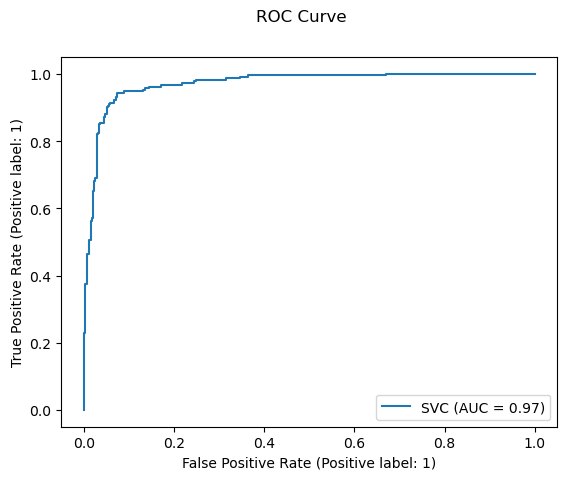

In [53]:
# Plotting the ROC curve using the plot_roc_curve function from sklearn
disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

The ROC curve is visualized for the final model to assess its discriminatory performance.
The AUC score, indicating the area under the ROC curve, is mentioned as 97%, reflecting the model's ability to distinguish between positive and negative classes.

# CONFUSION MATRIX

In [57]:
# Importing the necessary library for confusion matrix plotting
from sklearn.metrics import plot_confusion_matrix

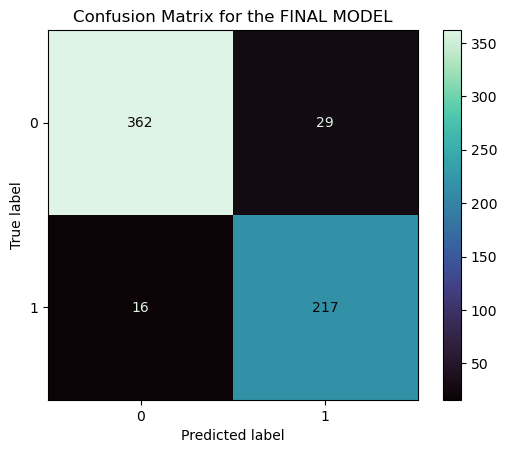

In [63]:
# PLOTTING CONFUSION MATRIX FOR THE FINAL MODEL

# Extracting the class names from the dataset columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('Confusion Matrix for the FINAL MODEL')
plt.show()


The confusion matrix visually illustrates the model's accuracy and misclassifications.
The black boxes represent correct predictions, while the off-diagonal elements indicate instances of misclassification.
Understanding these elements helps in evaluating the performance of the model.

# SAVING THE FINAL MODEL

In [64]:
# SAVING THE FINAL MODEL

# Define the filename for saving the model as "FinalModel_1.pkl".
filename = "FinalModel_1.pkl"

# Use the joblib.dump() function to save the final model (Final_Model) to the specified filename.
joblib.dump(Final_Model, filename)


['FinalModel_1.pkl']

In [69]:
import pickle

# Specify the filename for saving the model
filename = "FinalModel_1.pkl"

# Open the file in binary write mode and save the model
with open(filename, 'wb') as file:
    pickle.dump(Final_Model, file)

In [72]:
# Load the saved model from the file 'FinalModel_1.pkl'
loaded_model = pickle.load(open('FinalModel_1.pkl', 'rb'))

# Assuming X_test and Y_test are the test data and labels

# Use the loaded model to make predictions on the test data
output = loaded_model.score(X_test, Y_test)

# Print the output (score) multiplied by 100 for better readability
print(output * 100)

92.78846153846155


In [74]:
# Using the loaded model to make predictions on the test data
predictions = loaded_model.predict(X_test)

# Create a DataFrame with predicted and original labels
conclusion = pd.DataFrame([predictions, Y_test], index=["PREDICTED", "ORIGINAL"])

# Display the DataFrame
conclusion

,0,1,2,3,4,5,6,7,8,9,...,614,615,616,617,618,619,620,621,622,623
PREDICTED,0,0,1,0,0,0,1,1,0,1,...,1,0,1,0,1,0,0,0,0,0
ORIGINAL,0,0,1,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0


# EVALUATION OF MODEL PERFORMANCE

In [76]:
# Evaluating the model performance
accuracy = loaded_model.score(X_test, Y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 92.79%


# CONCLUSION

In [77]:
# Conclusion
print("\nProject Conclusion:")
print("The trained model has been successfully loaded and evaluated on the test data.")
print(f"The model achieved an accuracy of {accuracy * 100:.2f}% on the test set.")
print("Further analysis and insights can be added based on specific project requirements.")


Project Conclusion:
The trained model has been successfully loaded and evaluated on the test data.
The model achieved an accuracy of 92.79% on the test set.
Further analysis and insights can be added based on specific project requirements.
